# DATA SUMMARIES

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import cluster
import sklearn
import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [58]:
# allow us to see all columns
pd.set_option('display.max_columns', None)

In [59]:
df = pd.read_csv("../Datasets_P1/df_scaled.csv")
df

,rpt_rec_num,Provider_CCN,Facility_Name,City,State_Code,Zip_Code,County,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Overhead_Non_Salary_Costs,Year,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_Income,Total_RUG_Days,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Fixed_equipment,Total_Charges,SNF_Number_of_Beds,Total_long_term_liabilities,Investments,Net_Income_from_service_to_patients,Wage-related_Costs_(core),Total_Salaries_(adjusted),SNF_Average_Length_of_Stay_Total,Notes_Payable,Other_long_term_liabilities,Allowable_Bad_Debts,SNF_Average_Length_of_Stay_Title_XVIII,Total_General_Inpatient_Care_Services_Revenue,Total_Liabilities_and_fund_balances,SNF_Average_Length_of_Stay_Title_XIX,Total_Current_Assets,Total_Other_Income,SNF_Bed_Days_Available,Prepaid_expenses,Rural_versus_Urban,Street_Address,Medicare_CBSA_Number,Land
0,1089712,495134,RIDGECREST MANOR NURSING & REHAB CTR,DUFFIELD,VA,24244,SCOTT,11/1/2014,12/31/2014,4.0,549090.0,2015,1366877.0,292277.0,NaN,54091.0,311430.0,1800296.0,154022.0,1800296.0,1209322.0,279666.0,59343.0,311430.0,1520630.0,120.0,NaN,5667.0,2.0,40.0,6.0,48.0,534.0,5853.0,333.0,6720.0,9.0,35.0,5.0,49.0,117929.0,765020.0,7320.0,211585.0,534.0,5853.0,333.0,6720.0,9.0,35.0,5.0,49.0,311431.0,333.0,453591.0,55061.0,311430.0,453590.0,-729268.0,NaN,NaN,120.0,-1.0,NaN,311308.0,80664.0,660232.0,137.14,NaN,NaN,NaN,66.60,1182049.0,765020.0,167.23,1439227.0,123.0,NaN,NaN,U,157 ROSS-CARTER BLVD,28700.0,NaN
1,1091410,75417,REGENCY HEIGHTS OF NORWICH LLC,NORWICH,CT,6360,NEW LONDON,10/1/2014,12/14/2014,4.0,1886441.0,2015,1326379.0,NaN,NaN,-339775.0,-4896947.0,2843541.0,393088.0,2843541.0,3005301.0,426716.0,407352.0,-588469.0,2416825.0,114.0,36000.0,2596536.0,38.0,NaN,23.0,61.0,7241.0,NaN,856.0,8097.0,36.0,NaN,23.0,59.0,12590.0,1687456.0,8550.0,207903.0,7241.0,NaN,856.0,8097.0,36.0,NaN,23.0,59.0,-588469.0,856.0,2765768.0,671306.0,-4896947.0,6584403.0,36000.0,NaN,NaN,114.0,3818635.0,NaN,-588476.0,559430.0,1118860.0,137.24,NaN,NaN,NaN,37.22,2429100.0,1687456.0,NaN,980150.0,7.0,NaN,NaN,U,60 CROUCH AVENUE,35980.0,NaN
2,1093283,165252,WESTVIEW ACRES CARE CENTER,LEON,IA,50144,DECATUR,10/1/2014,12/31/2014,4.0,290554.0,2015,135859.0,79894.0,NaN,87279.0,52141.0,613243.0,20234.0,613243.0,639168.0,13210.0,NaN,-47859.0,600033.0,60.0,NaN,25982.0,5.0,4.0,3.0,12.0,956.0,2548.0,71.0,3575.0,3.0,3.0,3.0,9.0,48546.0,244239.0,5520.0,22920.0,956.0,2548.0,71.0,3575.0,3.0,3.0,3.0,9.0,-30743.0,71.0,192098.0,NaN,52141.0,192098.0,NaN,NaN,NaN,60.0,0.0,NaN,-39135.0,42209.0,348614.0,397.22,NaN,NaN,NaN,23.67,596683.0,244239.0,849.33,244239.0,8392.0,NaN,NaN,R,203 SW LORRAINE,99916.0,NaN
3,1095547,225497,VERO HEALTH & REHAB PARKWAY,WEST ROXBURY,MA,2132,SUFFOLK,11/1/2014,12/31/2014,4.0,839217.0,2015,1222903.0,537451.0,NaN,352766.0,6382.0,1935277.0,172528.0,1935277.0,1444469.0,557114.0,NaN,-63638.0,1378163.0,141.0,NaN,97267.0,15.0,15.0,9.0,39.0,2883.0,2881.0,349.0,6113.0,13.0,13.0,6.0,32.0,201598.0,1830758.0,8601.0,158386.0,2883.0,2881.0,349.0,6113.0,13.0,13.0,6.0,32.0,-63638.0,349.0,1824376.0,26949.0,6382.0,1824376.0,74985.0,NaN,NaN,141.0,0.0,NaN,-66306.0,113676.0,601118.0,191.03,NaN,NaN,NaN,58.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104195 entries, 0 to 104194
Data columns (total 83 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   rpt_rec_num                                    104195 non-null  int64  
 1   Provider_CCN                                   104195 non-null  int64  
 2   Facility_Name                                  104195 non-null  object 
 3   City                                           104195 non-null  object 
 4   State_Code                                     104195 non-null  object 
 5   Zip_Code                                       104195 non-null  object 
 6   County                                         104195 non-null  object 
 7   Fiscal_Year_Begin_Date                         104195 non-null  object 
 8   Fiscal_Year_End_Date                           104195 non-null  object 
 9   Type_of_Control                      

In [61]:
df = df[df['Number_of_Beds'] <= 8000]

In [62]:
from sklearn.impute import SimpleImputer

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Step 2: Impute missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='constant', fill_value=0)
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
    
# Step 3: Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Step 4: Convert appropriate columns to correct data types
df['Fiscal_Year_Begin_Date'] = pd.to_datetime(df['Fiscal_Year_Begin_Date'], errors='coerce')
df['Fiscal_Year_End_Date'] = pd.to_datetime(df['Fiscal_Year_End_Date'], errors='coerce')

# Step 5: Remove columns with a lot of missing Data... basing off of these columns. 
df = df[~((df['Number_of_Beds'].isna()) | (df['Number_of_Beds'] == 0) | 
          (df['Medicare_CBSA_Number'].isna()) | (df['Medicare_CBSA_Number'] == "Unknown"))]


C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_5692\1840874835.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_5692\1840874835.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])
C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_5692\1840874835.py:15: SettingWithCopyWarning: 
A value is trying t

In [63]:
df.describe()

,rpt_rec_num,Provider_CCN,Fiscal_Year_Begin_Date,Fiscal_Year_End_Date,Type_of_Control,Overhead_Non_Salary_Costs,Year,Accounts_Receivable,Accounts_payable,Buildings,Cash_on_hand_and_in_banks,General_fund_balance,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,Less_discounts_on_patients,Major_movable_equipment,Net_Income,Net_Patient_Revenue,Number_of_Beds,Other_Assets,Other_current_liabilities,SNF_Admissions_Other,SNF_Admissions_Title_XIX,SNF_Admissions_Title_XVIII,SNF_Admissions_Total,SNF_Days_Other,SNF_Days_Title_XIX,SNF_Days_Title_XVIII,SNF_Days_Total,SNF_Discharges_Title_Other,SNF_Discharges_Title_XIX,SNF_Discharges_Title_XVIII,SNF_Discharges_Total,Salaries_wages_and_fees_payable,Total_Assets,Total_Bed_Days_Available,Total_Costs,Total_Days_Other,Total_Days_Title_XIX,Total_Days_Title_XVIII,Total_Days_Total,Total_Discharges_Title_Other,Total_Discharges_Title_XIX,Total_Discharges_Title_XVIII,Total_Discharges_Total,Total_Income,Total_RUG_Days,Total_current_liabilities,Total_fixed_Assets,Total_fund_balances,Total_liabilities,Total_other_Assets,Fixed_equipment,Total_Charges,SNF_Number_of_Beds,Total_long_term_liabilities,Investments,Net_Income_from_service_to_patients,Wage-related_Costs_(core),Total_Salaries_(adjusted),SNF_Average_Length_of_Stay_Total,Notes_Payable,Other_long_term_liabilities,Allowable_Bad_Debts,SNF_Average_Length_of_Stay_Title_XVIII,Total_General_Inpatient_Care_Services_Revenue,Total_Liabilities_and_fund_balances,SNF_Average_Length_of_Stay_Title_XIX,Total_Current_Assets,Total_Other_Income,SNF_Bed_Days_Available,Prepaid_expenses,Medicare_CBSA_Number,Land
count,1.038540e+05,103854.000000,103854,103854,103854.000000,1.038540e+05,103854.000000,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,103854.000000,1.038540e+05,1.038540e+05,103854.000000,103854.000000,103854.000000,103854.000000,103854.000000,1.038540e+05,103854.000000,1.038540e+05,103854.000000,103854.000000,103854.000000,103854.000000,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,103854.000000,1.038540e+05,103854.000000,1.038540e+05,103854.000000,103854.000000,103854.000000,103854.000000,1.038540e+05,103854.000000,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,103854.000000,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,1.038540e+05,103854.000000,1.038540e+05,1.038540e+05,1.038540e+05,103854.000000,1.038540e+05,1.038540e+05,103854.000000,1.038540e+05,1.038540e+05,103854.000000,1.038540e+05,1.038540e+05,1.038540e+05
mean,1.245930e+06,297337.672184,2018-01-27 13:28:57.708706560,2019-01-08 23:48:02.038245888,4.143634,5.789197e+06,2017.997574,2.235209e+06,9.316088e+05,6.706653e+06,2.544250e+06,3.259062e+06,1.179592e+07,2.071419e+06,1.170012e+07,1.008655e+07,2.505828e+06,9.584291e+05,7.219091e+04,9.290097e+06,117.226010,2.470381e+06,9.909467e+05,106.086496,39.920966,122.784553,269.007684,8716.366957,1.689761e+04,3727.161352,2.936024e+04,115.607189,54.828432,112.412772,281.246095,4.727824e+05,1.589541e+07,4.078707e+04,1.306691e+06,10911.342153,1.716747e+04,3761.572159,3.186009e+04,116.580180,55.610087,112.422016,287.143894,2.070155e+05,2612.431346,4.515135e+06,6.163267e+06,3.293290e+06,1.258816e+07,3.633232e+06,1.123025e+06,5.929802e+05,108.248878,8.071722e+06,3.196893e+05,-7.964562e+05,8.261228e+05,4.138762e+06,172.013825,4.332144e+05,1.013688e+06,2.388156e+04,47.894724,9.246331e+06,1.588145e+07,520.315700,6.098907e+06,1.002559e+06,10777.722668,4.344347e+04,7.701809e+04,2.795003e+05
min,1.089712e+06,15009.000000,2014-10-01 00:00:00,2014-12-14 00:00:00,1.000000,1.000000e+00,2015.000000,-6.628446e+07,-9.573823e+08,-2.877344e+07,-5.222312e+08,-1.000000e+09,-1.669697e+07,0.000000e+00,-1.669697e+07,0.000000e+00,-1.814712e+07,-3.784215e+06,-1.674696e+08,-6.586137e+07,1.000000,-8.936264e+07,-1.520153e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00

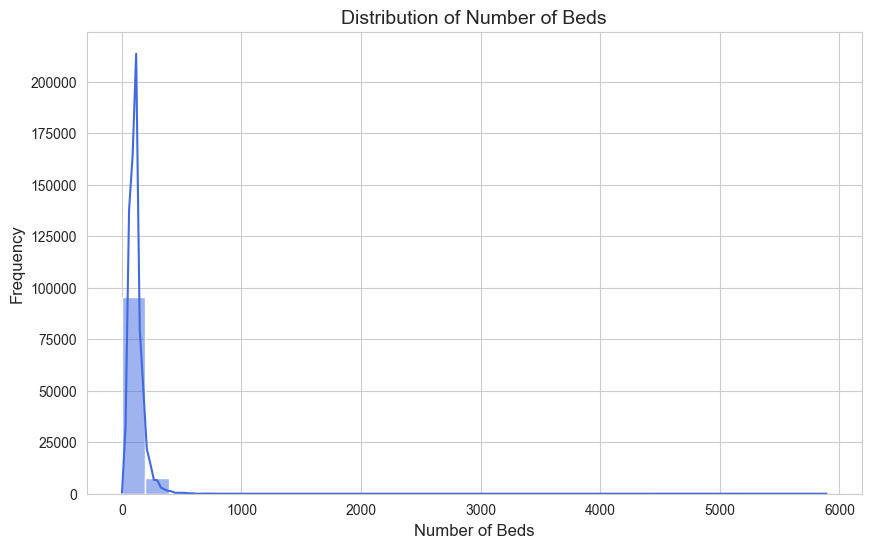

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Beds'], bins=30, kde=True, color='royalblue')

# Labels and title
plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Number of Beds', fontsize=14)

# Show plot
plt.show()

In [65]:
# Total_Days_Total / Total_Bed_Days_Available = Occupancy Rate 

In [66]:
df['Provider_CCN'].nunique()


14943

In [67]:
# Count unique nursing homes (Provider_CCN) per year
nursing_homes_per_year = df.groupby('Year')['Provider_CCN'].nunique().reset_index()

# Rename columns for clarity
nursing_homes_per_year.columns = ['Year', 'Unique_Nursing_Homes']

# Display the result
print(nursing_homes_per_year)


     Year  Unique_Nursing_Homes
0  2015.0                 13952
1  2016.0                 14021
2  2017.0                 14244
3  2018.0                 14250
4  2019.0                 14228
5  2020.0                 14207
6  2021.0                 14160
